## Checking images before and after preprocessing

In [1]:
# Base imports
import pandas as pd
import numpy as np
import os
import sys
import cv2

# Add the parent directory to sys.path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Custom imports
from classification.ml_logic.preprocessor import Preprocessor

## Testing preprocessor outputs

### Load sample images from each dataset

In [2]:
# Directory paths
SAMPLE_DIR = os.path.abspath(os.path.join(os.getcwd(), '..', 'raw_data', 'Sample_images'))

sample_images_paths = os.listdir(SAMPLE_DIR)

In [3]:
sample_images_paths

['462822612.dcm',
 '865_2075900290_png.rf.974afc76c5294d355fc5a4f587944097.jpg',
 '1759_276588619_png.rf.a1e7b1bd0a54dae0272a0f5643369e08.jpg',
 'C_0004_1.RIGHT_CC.jpg',
 'C_0004_1.LEFT_CC.jpg',
 '833024366.dcm',
 'A_0006_1.LEFT_CC.jpg',
 'C_0010_1.RIGHT_MLO.jpg',
 '236_1531879119_png.rf.d2dac57247715c2a5313813b446c7f9a.jpg',
 'C_0010_1.LEFT_MLO.jpg',
 '106_76321767_png.rf.aa21c5be141d4ee32be960f2dfc4db8f.jpg',
 'A_0006_1.RIGHT_CC.jpg',
 '938549206.dcm',
 '106_2018825992_png.rf.84bd6edac6985eb2c26bc562cf98d0cd.jpg',
 '1459541791.dcm']

In [4]:
preprocessor = Preprocessor()

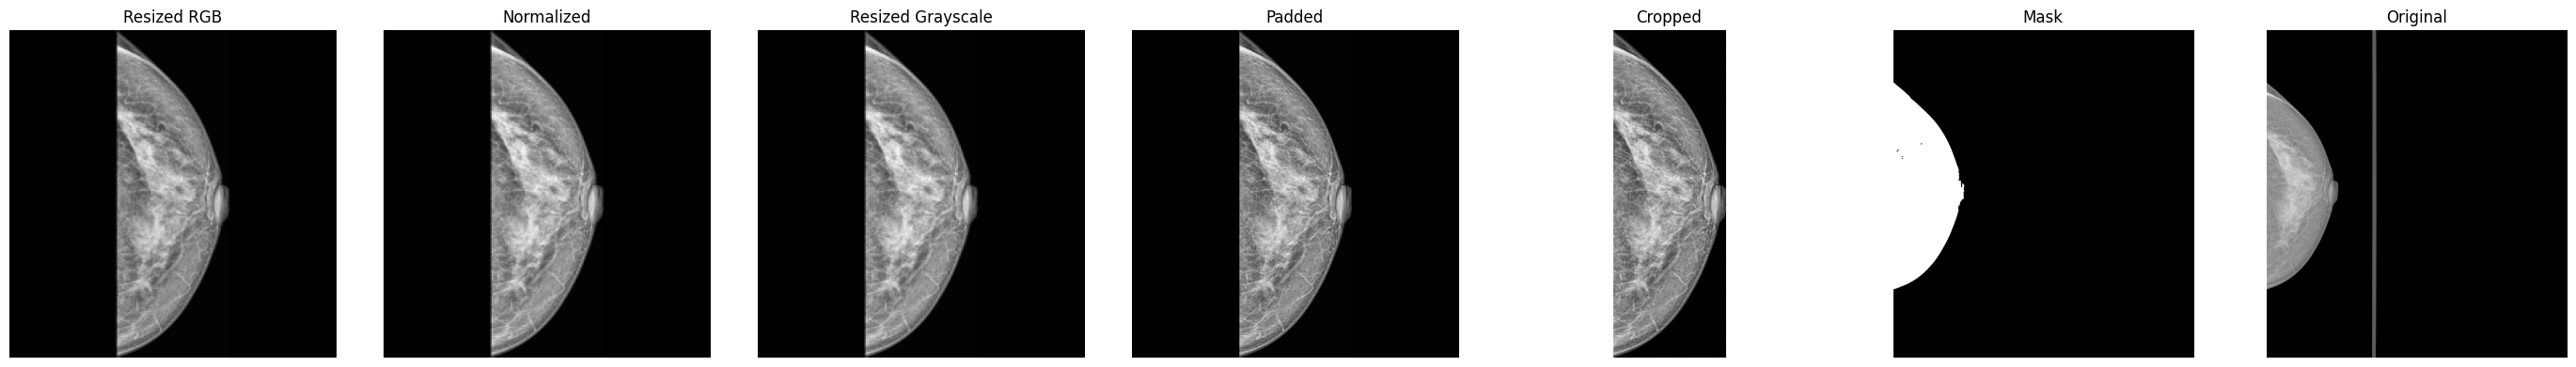

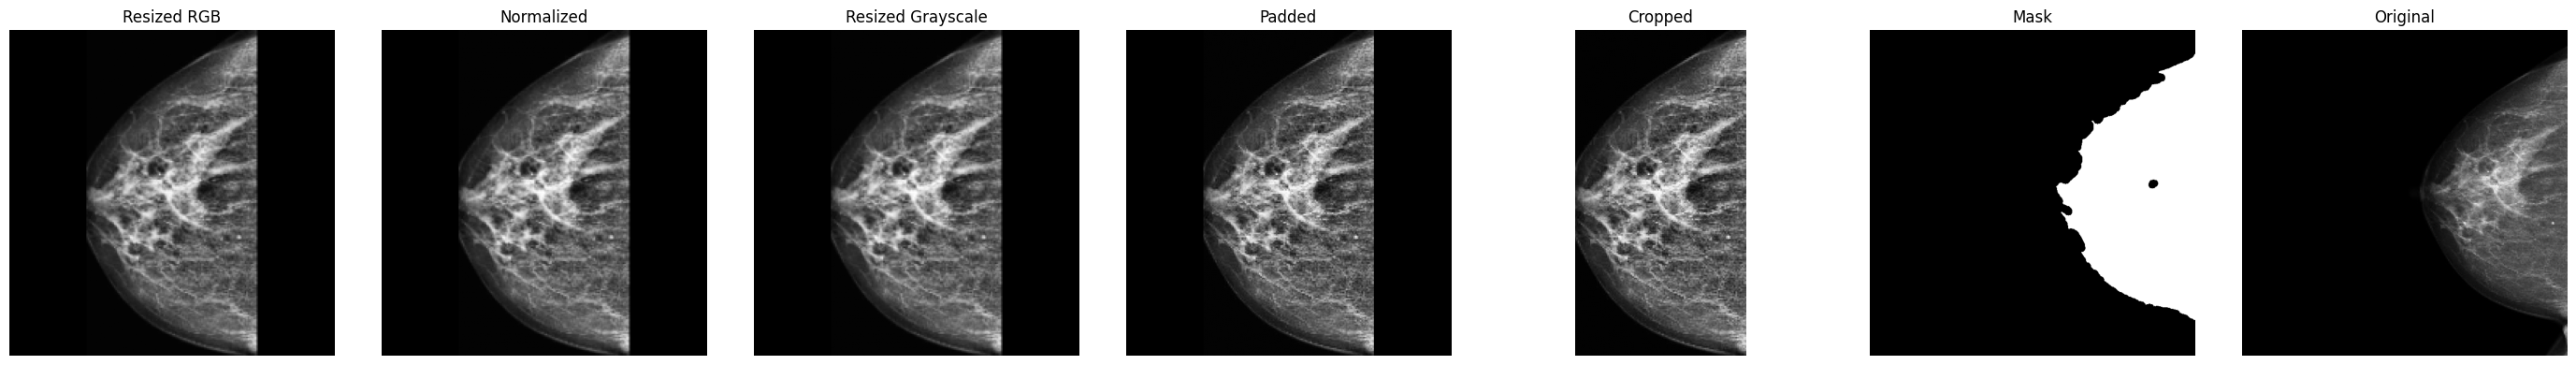

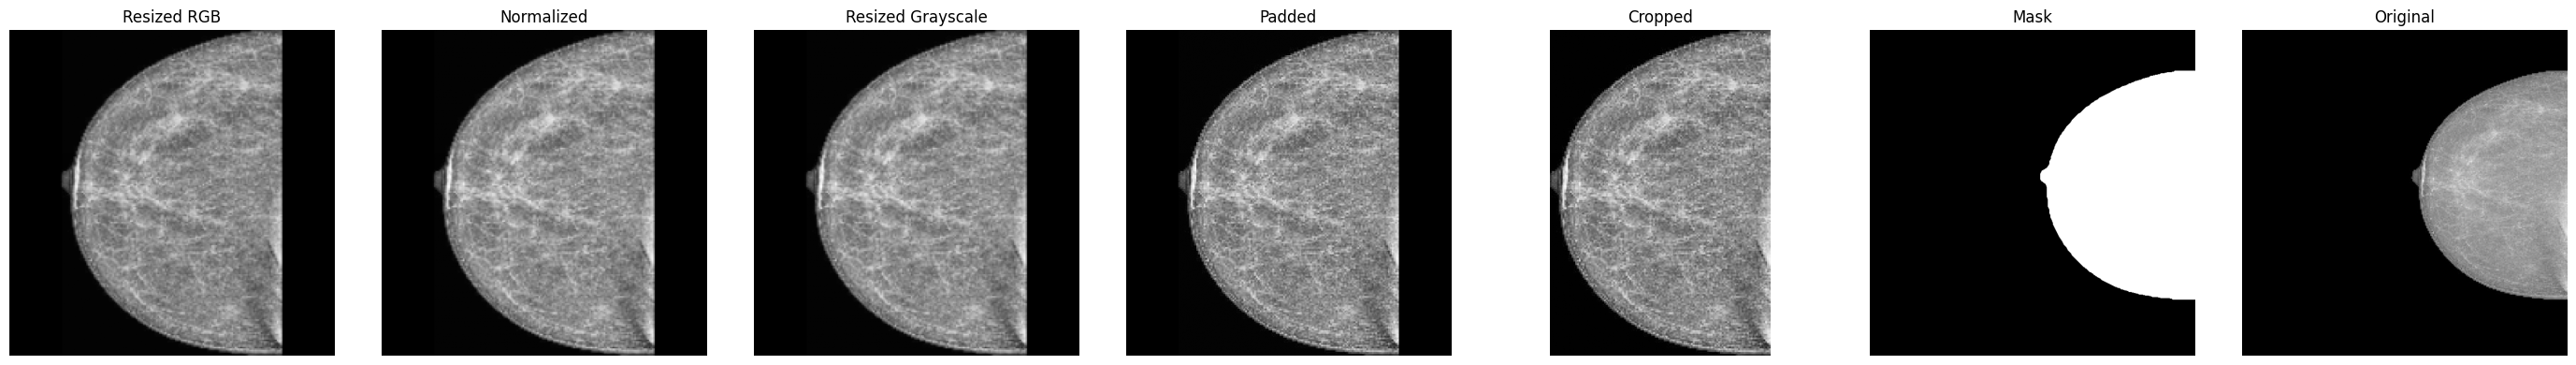

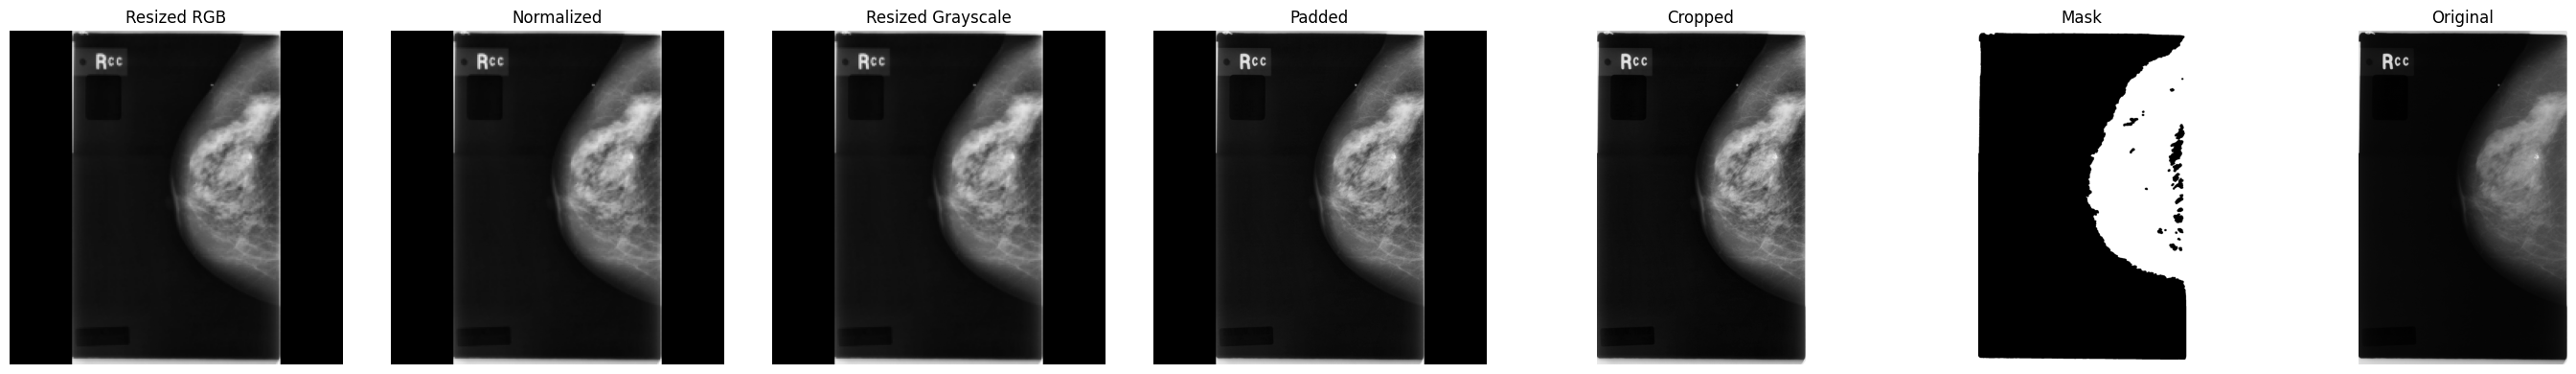

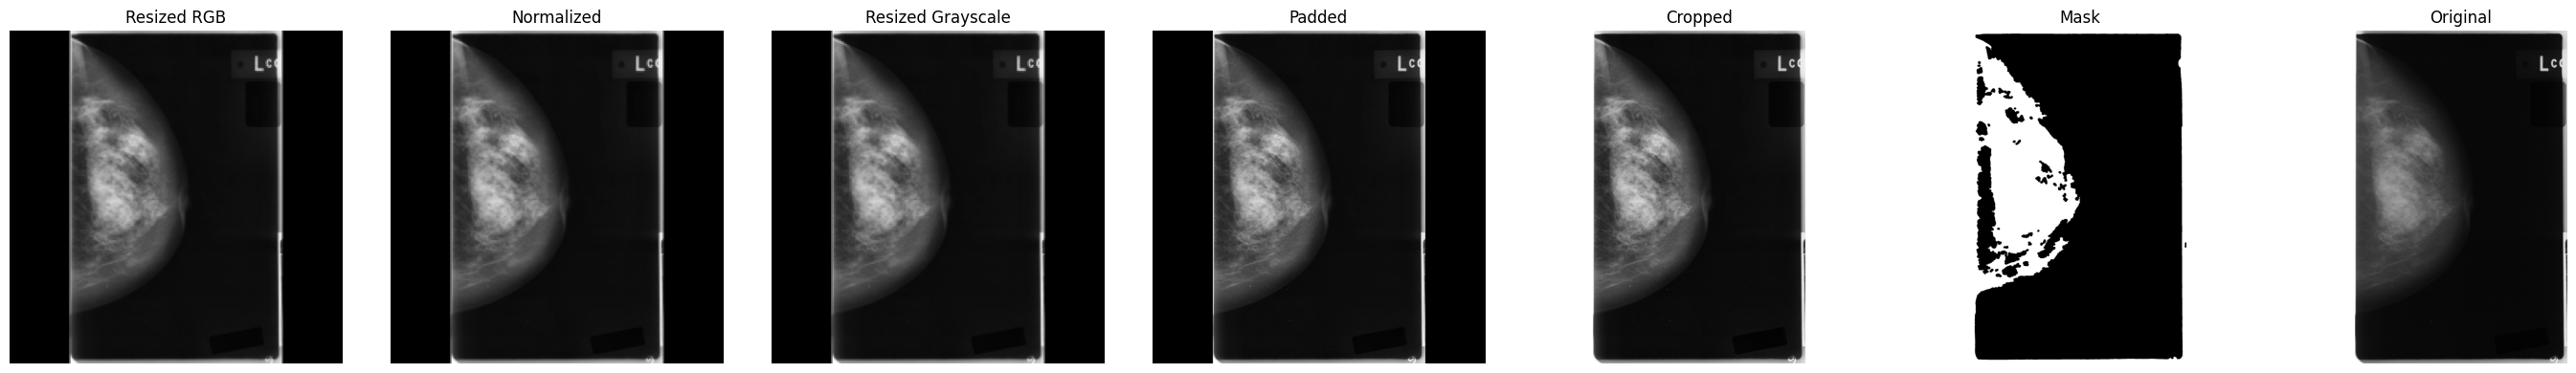

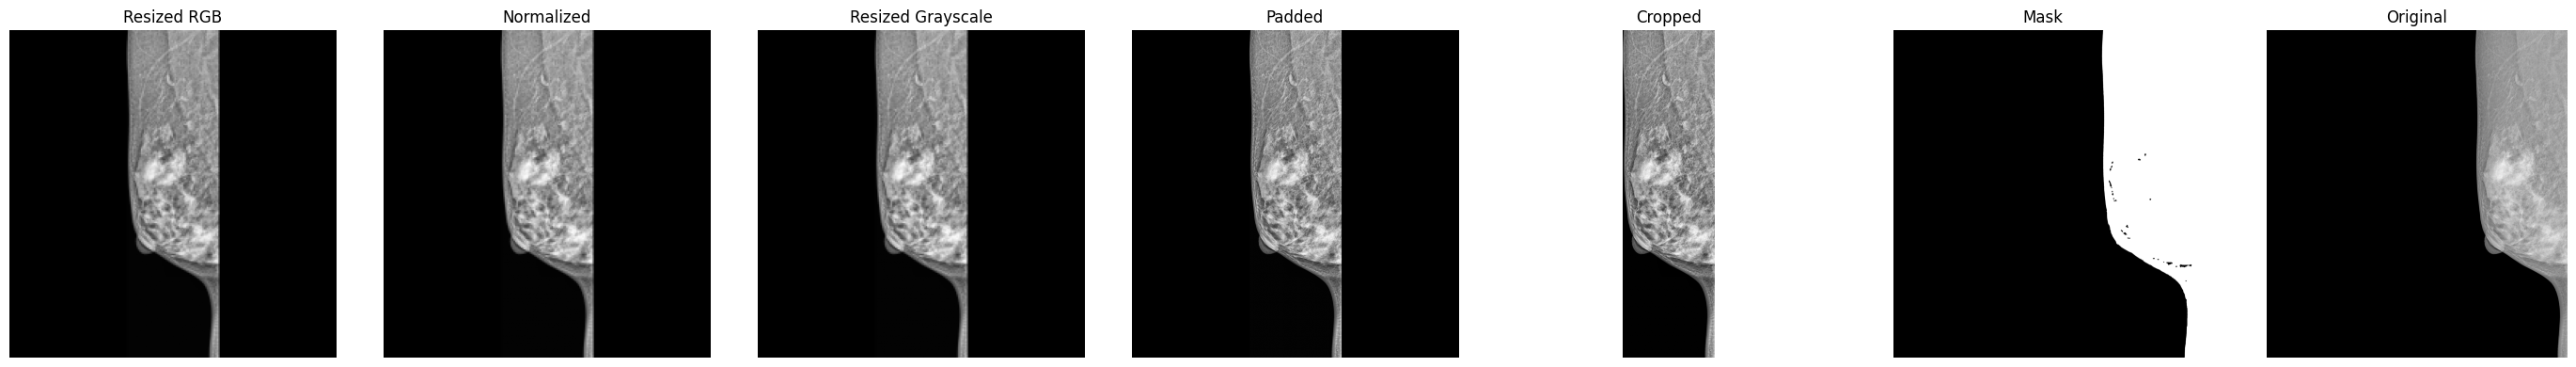

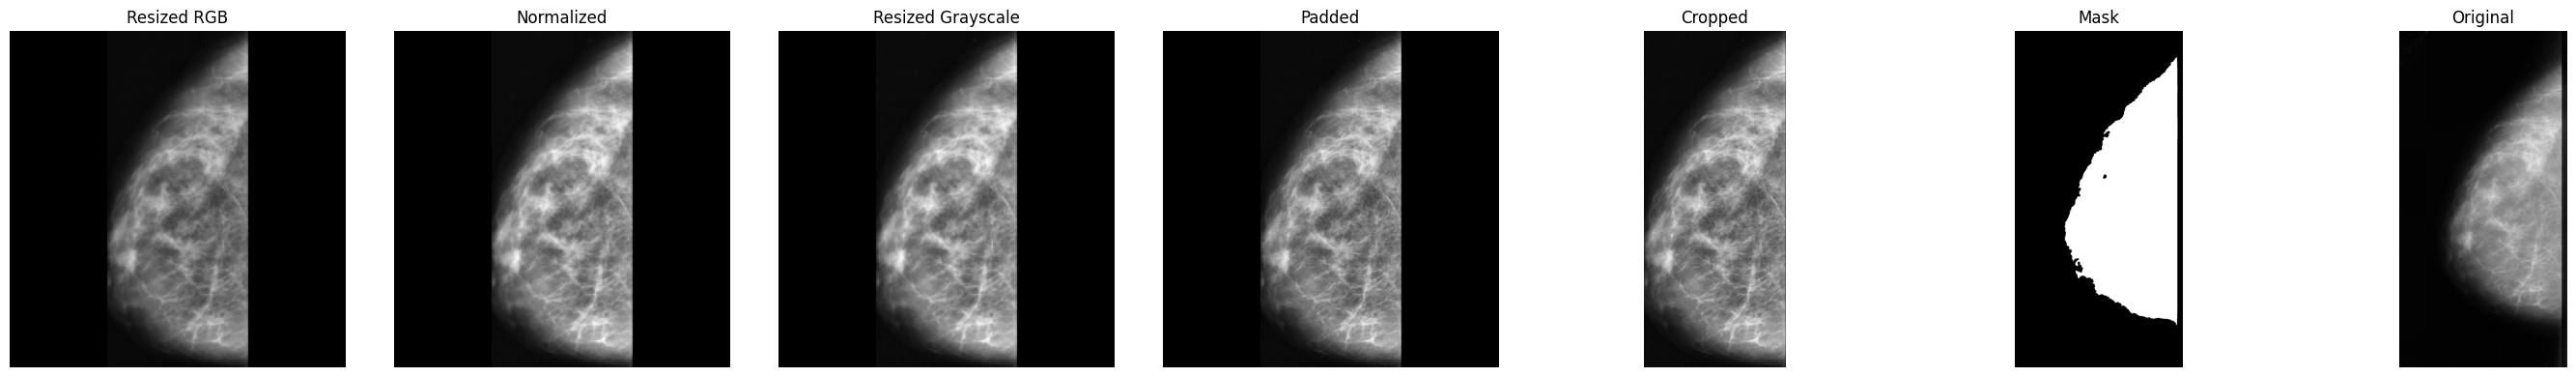

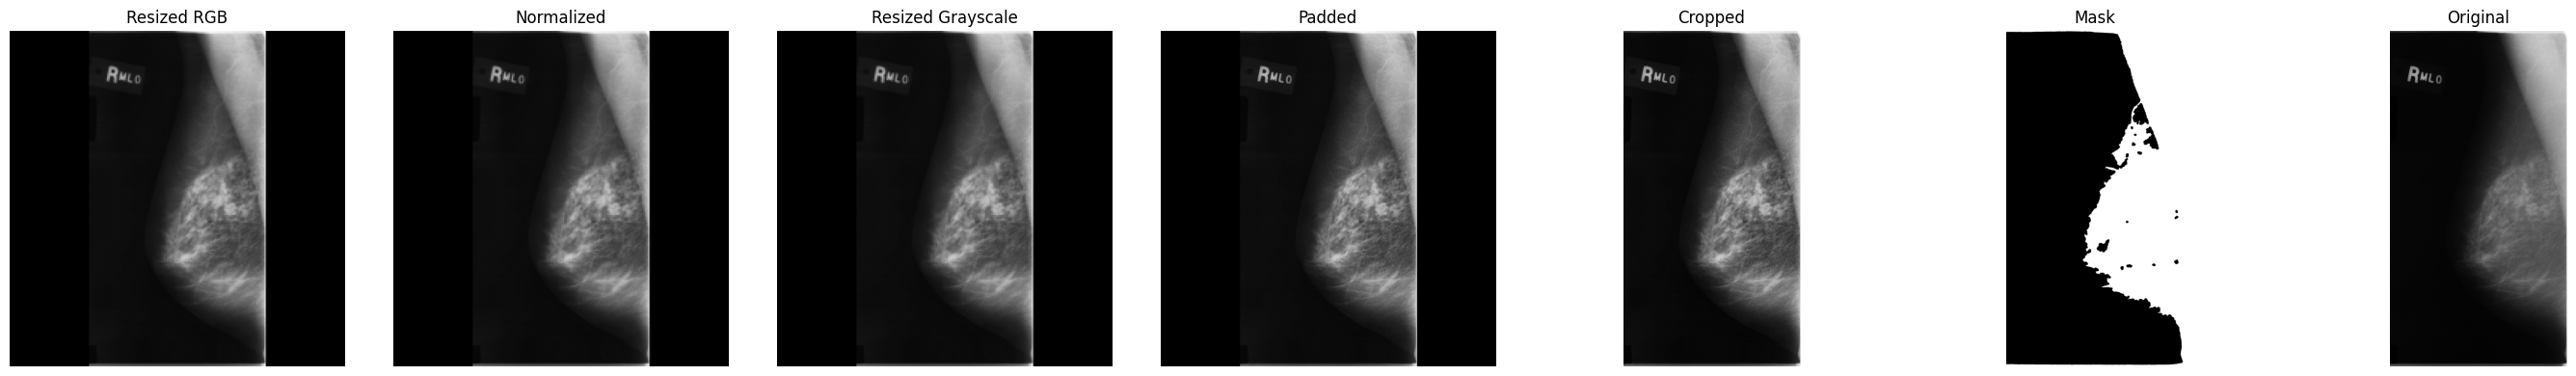

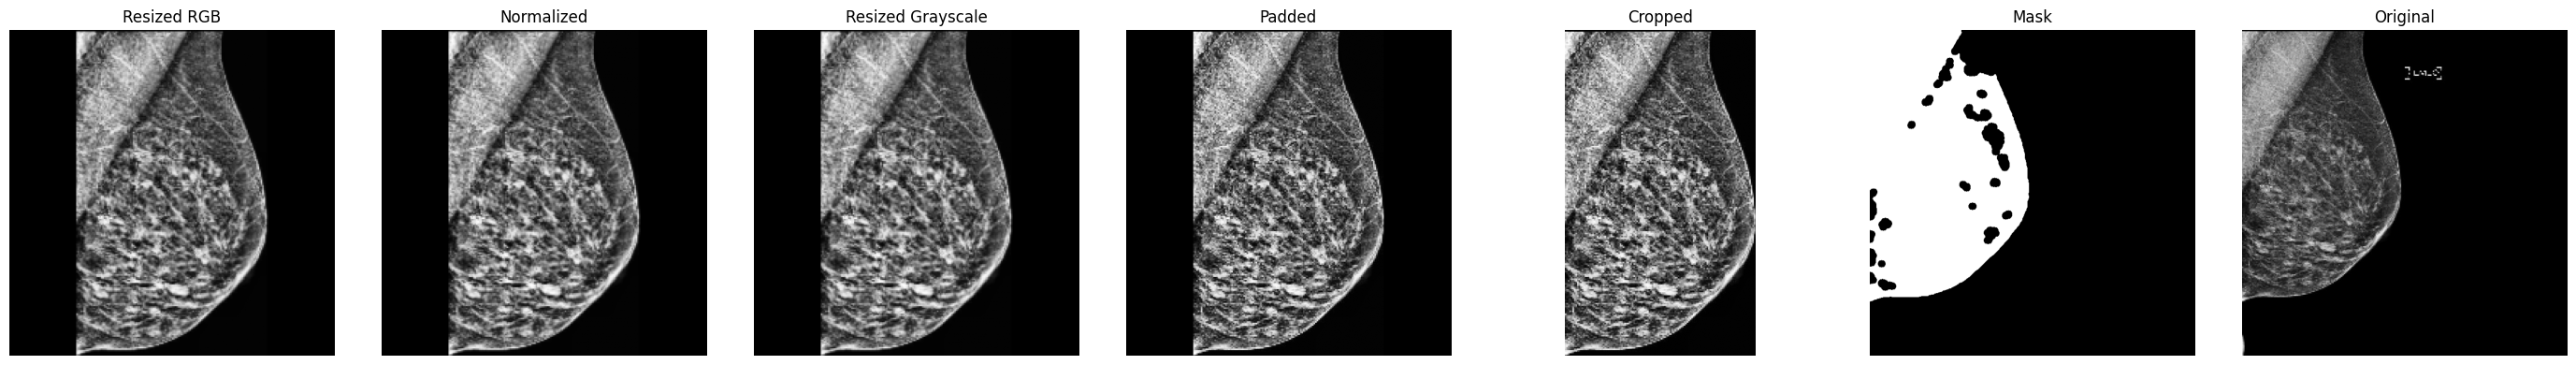

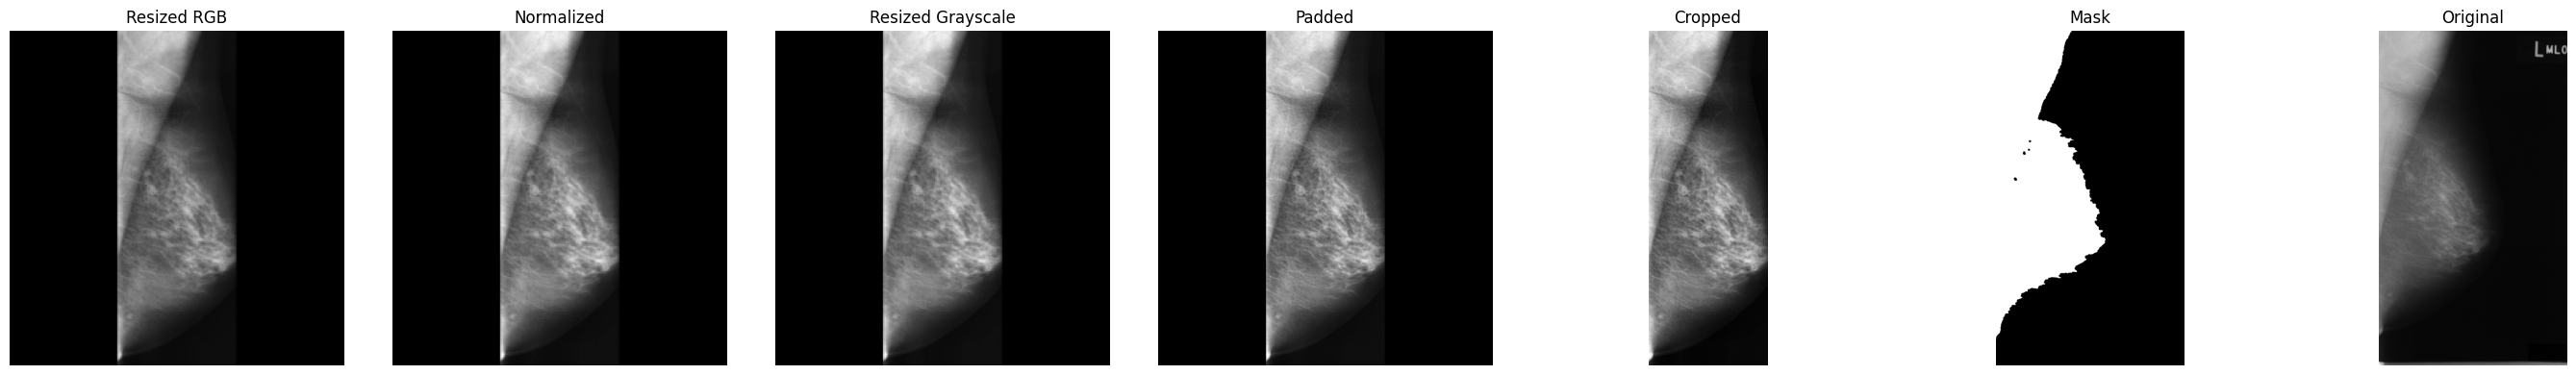

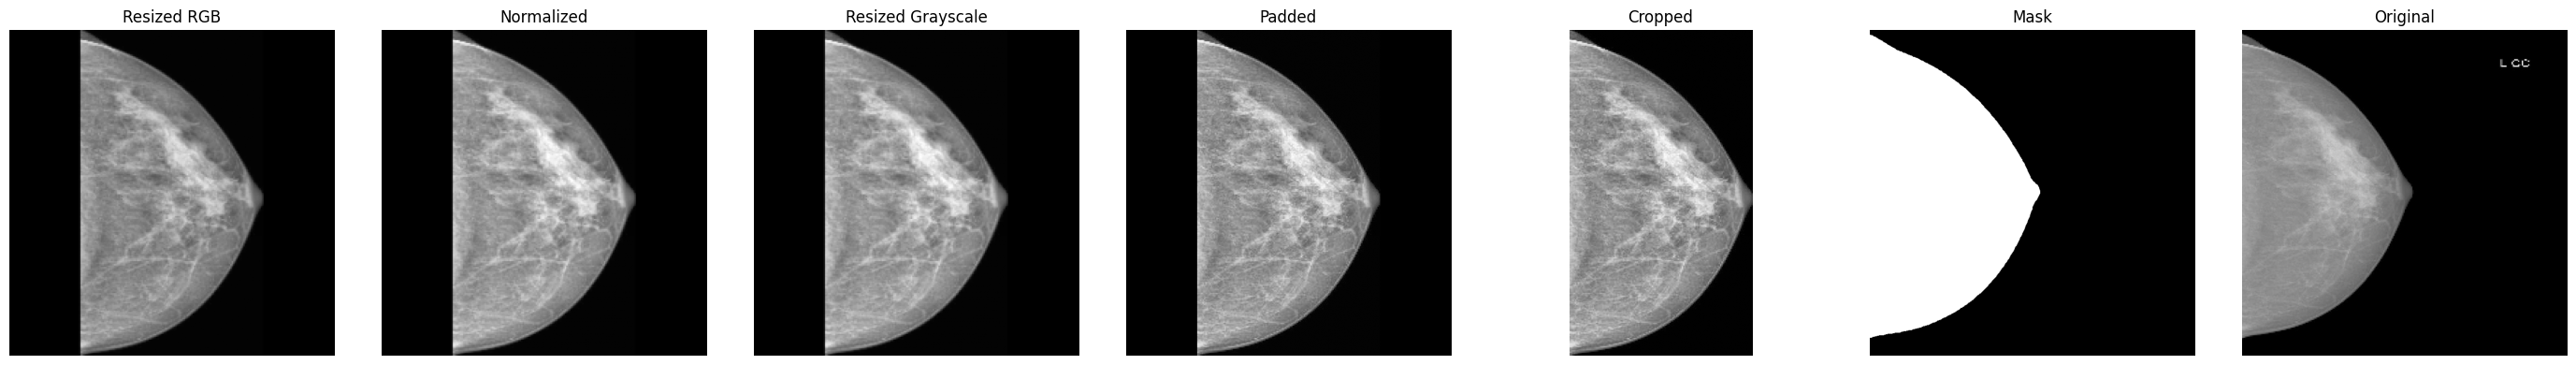

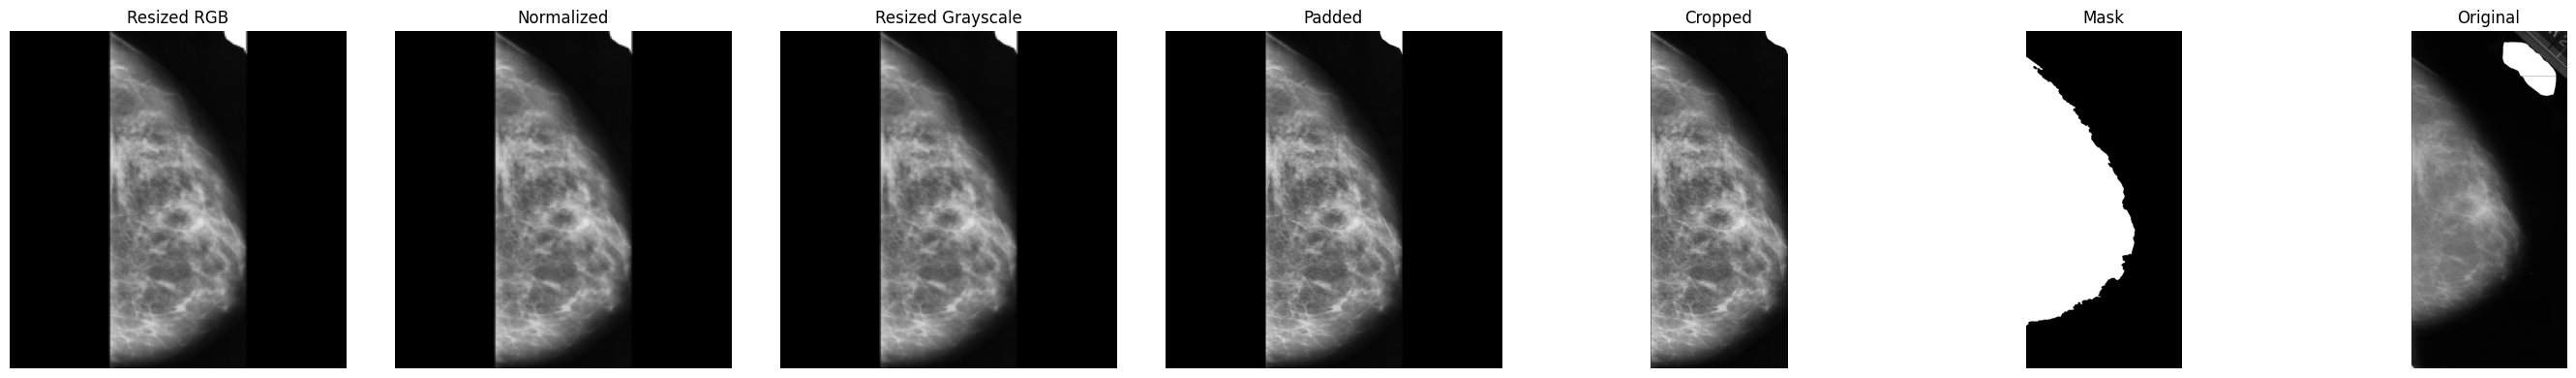

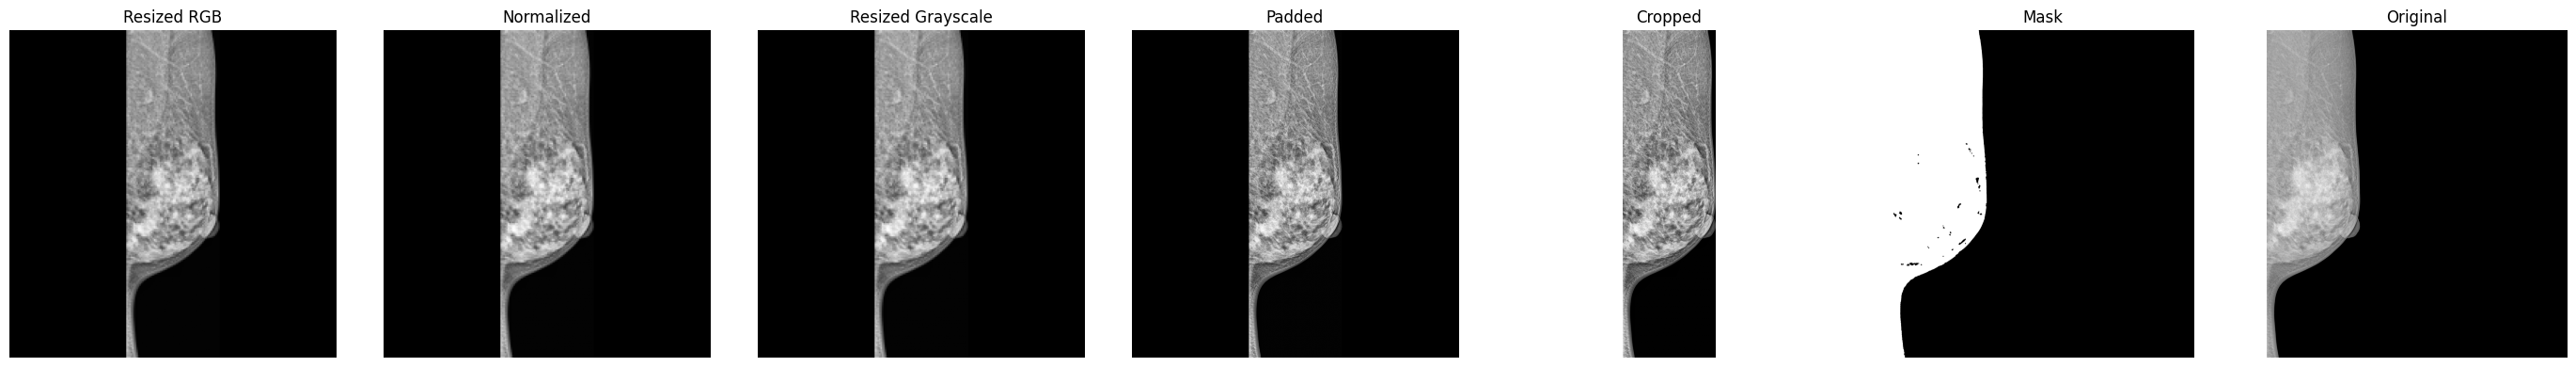

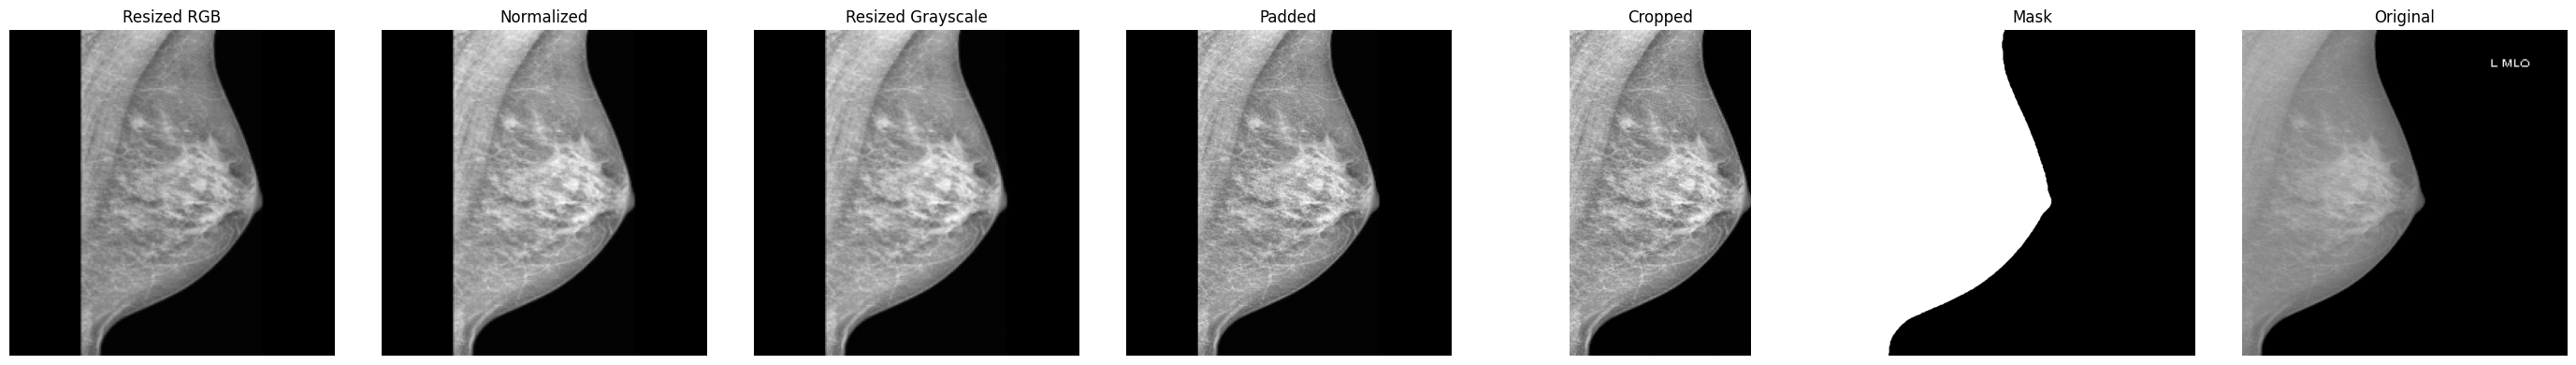

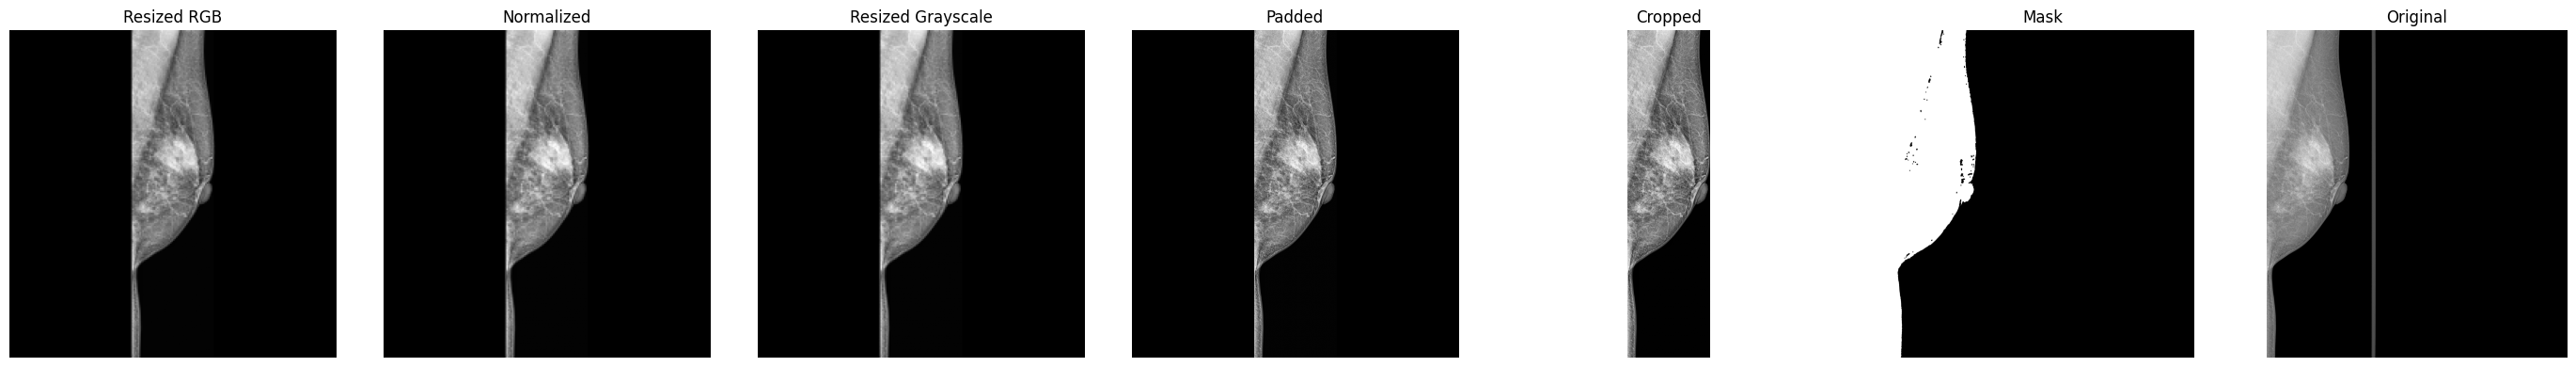

In [6]:
import matplotlib.pyplot as plt

def visualize_intermediate_images(images_tuple):
    """Visualize intermediate images side by side."""
    titles = ['Resized RGB', 'Normalized', 'Resized Grayscale', 'Padded', 'Cropped', 'Mask', 'Original']
    n = len(images_tuple)
    plt.figure(figsize=(4 * n, 4))
    for i in range(n):
        plt.subplot(1, n, i+1)
        if images_tuple[i].ndim == 2:  # Grayscale
            plt.imshow(images_tuple[i], cmap='gray')
        else:  # RGB
            plt.imshow(images_tuple[i])
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

for image_path in sample_images_paths:
    image_path = os.path.join(SAMPLE_DIR, image_path)
    if not os.path.isfile(image_path):
        continue

    # Read the image
    image = cv2.imread(image_path)

    # Preprocess the image
    image_tuple = preprocessor.preprocess_image(image_path, test_mode=True)

    # Visualize the intermediate images
    visualize_intermediate_images((image_tuple))

In [ ]:
for image_path in sample_images_paths:
    image_path = os.path.join(SAMPLE_DIR, image_path)
    if not os.path.isfile(image_path):
        continue

    # Read the image
    image = cv2.imread(image_path)

    # Preprocess the image
    image_tuple = preprocessor.preprocess_image(image_path, test_mode=True, apply_clahe=False)

    # Visualize the intermediate images
    visualize_intermediate_images((image_tuple))

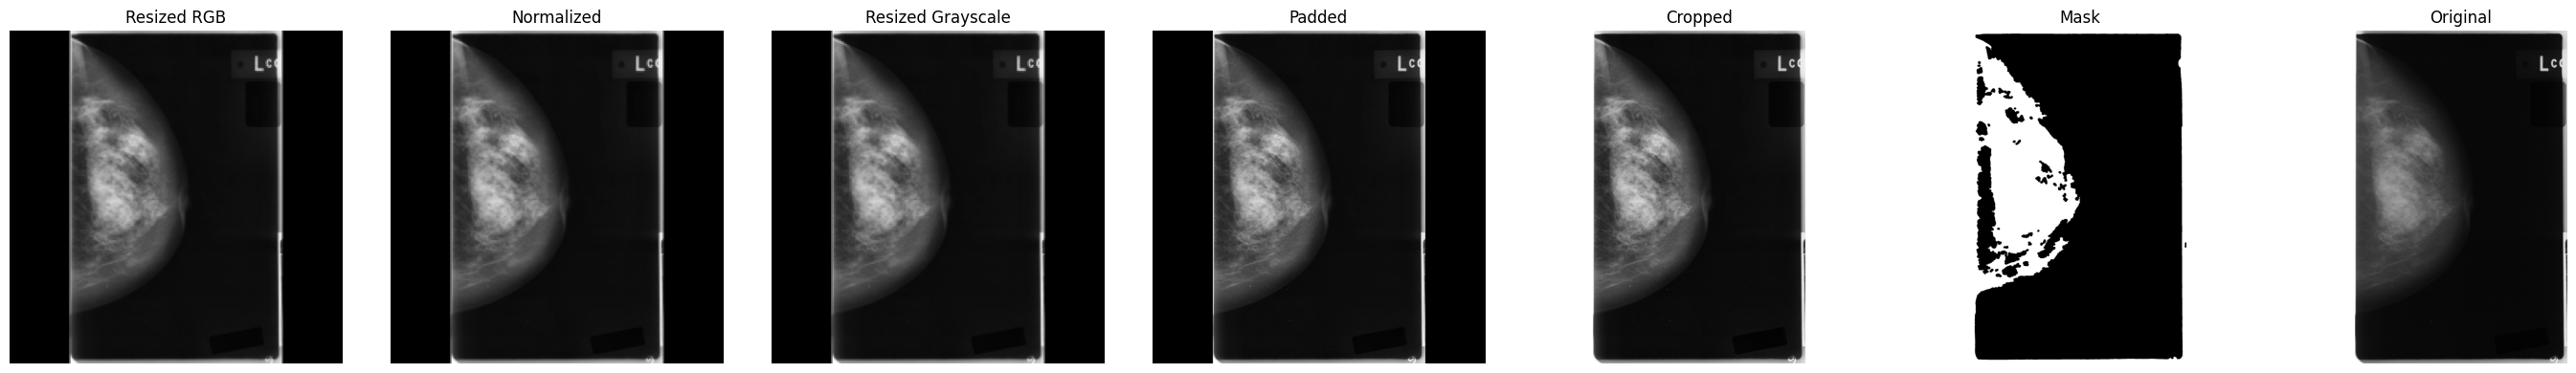

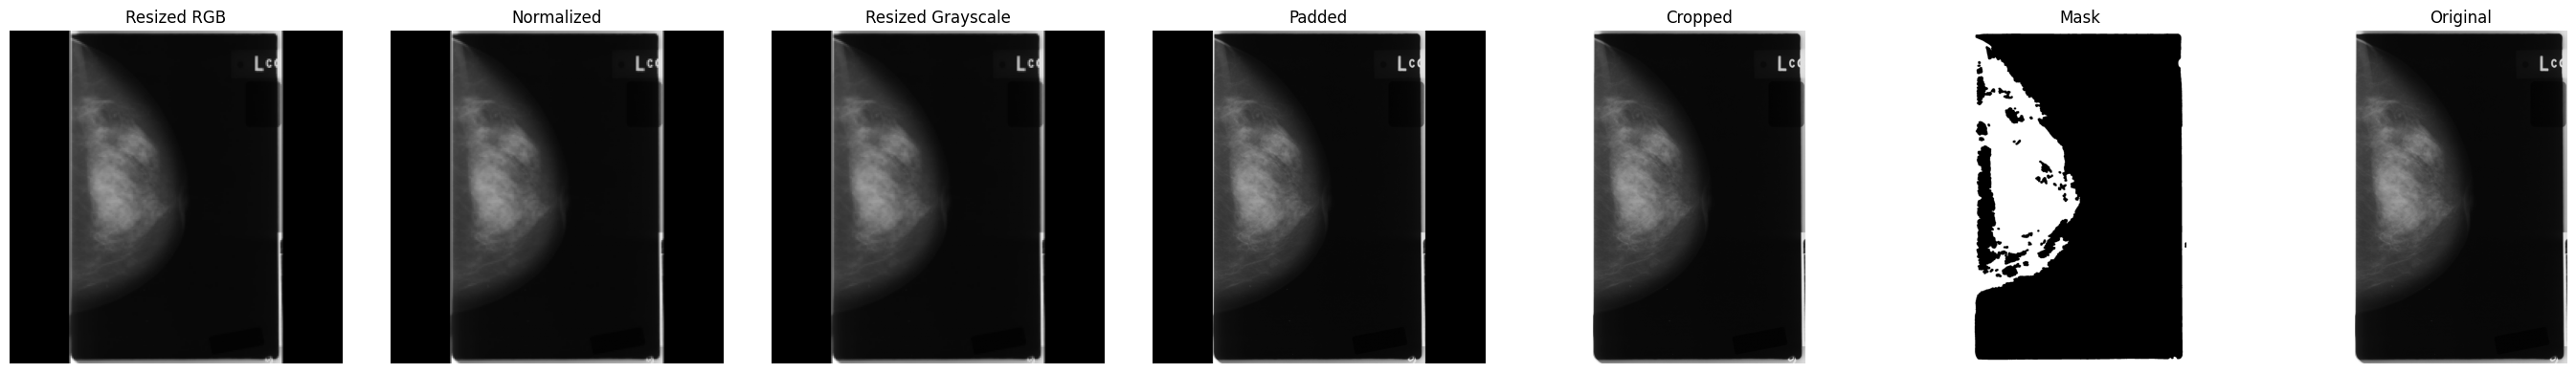

In [10]:
image_path = os.path.join(SAMPLE_DIR, sample_images_paths[4]) # Use the first image for demonstration

# Preprocess the image
image_tuple = preprocessor.preprocess_image(image_path, test_mode=True)
image_tuple_2 = preprocessor.preprocess_image(image_path, test_mode=True, apply_clahe=False)

# Visualize the intermediate images
visualize_intermediate_images((image_tuple))
visualize_intermediate_images((image_tuple_2))

In [9]:
print(f'Shape of final image: {image_tuple[0].shape}')
print(f'Min pixel value: {image_tuple[0].min()}')
print(f'Max pixel value: {image_tuple[0].max()}')

Shape of final image: (224, 224, 3)
Min pixel value: 0.0
Max pixel value: 0.95686274766922
